In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import phik
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import import_ipynb
from function_for_eda import *

importing Jupyter notebook from function_for_eda.ipynb


# Read Dataset

In [2]:
previous_application = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_previous_application.csv', sep=',')
application_train = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')

# Basic Information

In [3]:
print_basic_information(previous_application, 'Previous Application', ['SK_ID_PREV', 'SK_ID_CURR'])

The shape of Previous Application is: (1413701, 37)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Previous Application: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in Previous Application are: 1413701
Number of unique SK_ID_CURR in Previous Application are: 291057


In [4]:
get_column_names_by_type(previous_application)

{'int64': ['SK_ID_PREV',
  'HOUR_APPR_PROCESS_START',
  'NFLAG_LAST_APPL_IN_DAY',
  'DAYS_DECISION',
  'SELLERPLACE_AREA',
  'SK_ID_CURR'],
 'object': ['NAME_CONTRACT_TYPE',
  'WEEKDAY_APPR_PROCESS_START',
  'FLAG_LAST_APPL_PER_CONTRACT',
  'NAME_CASH_LOAN_PURPOSE',
  'NAME_CONTRACT_STATUS',
  'NAME_PAYMENT_TYPE',
  'CODE_REJECT_REASON',
  'NAME_TYPE_SUITE',
  'NAME_CLIENT_TYPE',
  'NAME_GOODS_CATEGORY',
  'NAME_PORTFOLIO',
  'NAME_PRODUCT_TYPE',
  'CHANNEL_TYPE',
  'NAME_SELLER_INDUSTRY',
  'NAME_YIELD_GROUP',
  'PRODUCT_COMBINATION'],
 'float64': ['AMT_ANNUITY',
  'AMT_APPLICATION',
  'AMT_CREDIT',
  'AMT_DOWN_PAYMENT',
  'AMT_GOODS_PRICE',
  'RATE_DOWN_PAYMENT',
  'RATE_INTEREST_PRIMARY',
  'RATE_INTEREST_PRIVILEGED',
  'CNT_PAYMENT',
  'DAYS_FIRST_DRAWING',
  'DAYS_FIRST_DUE',
  'DAYS_LAST_DUE_1ST_VERSION',
  'DAYS_LAST_DUE',
  'DAYS_TERMINATION',
  'NFLAG_INSURED_ON_APPROVAL']}

File preious_application.csv có 37 features. Trong đó có 2 features là SK_ID_PREV và SK_ID_CURR để chỉ ID cho các khoản vay của khách hàng.

- SK_ID_PREV là ID của khoản vay trước trong Home Credit liên quan đến khoản vay trong mẫu của chúng tôi. (Một khoản vay trong mẫu của chúng tôi có thể có 0,1,2 hoặc nhiều khoản vay trước trong Home Credit).
- SK_ID_CURR là ID cho khoản vay hiện tại của khách hàng với Home Credit.

35 features còn lại mô tả thống kê cho các hồ sơ các khoản vay trước đây tại Home Credit tương ứng với các ID của khách hàng.

### Features Understanding
- <b>SK_ID_PREV:</b>  ID of previous credit in Home Credit realted to loan in sample. 
1 loan can have 0,1,2 or more previous applications. 1 previous application could, but not necessarily have to lead to credit.
- <b>SK_ID_CURR:</b> ID of loan in sample (current loan)
-  <b>NAME_CONTRACT_TYPE:</b> Contract product type (4 values) 
    - Consumer loans
    - Cash loans
    - Revolving loans
    - XNA
- <b>AMT_ANNUITY:</b> Annuity of previous application
- <b>AMT_APPLICATION:</b> Amount of credit that client ask on the previous application
- <b>AMT_CREDIT:</b> Final credit amount that client received after approval process
- <b>AMT_DOWN_PAYMENT:</b> Down payment on the previous application
- <b>AMT_GOODS_PRICE:</b> Price of goods that client asked for (if applicable) on the previous application
- <b>WEEKDAY_APPR_PROCESS_START:</b> The day of week that client apply for previous application (7 values)
    - Monday
    - ...
    - Sunday
-  <b>HOUR_APPR_PROCESS_START:</b> Day hour that client apply for previous application
- <b>FLAG_LAST_APPL_PER_CONTRACT:</b> Flag if it was last application for the previous contract (2 values)
    - Y
    - N
- <b>NFLAG_LAST_APPL_IN_DAY:</b> Flag if the application was the last application per day of the client (2 values)
    - 1
    - 0
- <b>RATE_DOWN_PAYMENT:</b> Down payment rate <b>normalized</b> on previous credit
- <b>RATE_INTEREST_PRIMARY:</b> Interest rate <b>normalized</b> on previous credit
- <b>RATE_INTEREST_PRIVILEGED:</b> Privileged interest rate <b>normalized</b> on previous credit
- <b>NAME_CASH_LOAN_PURPOSE:</b> Purpose of cash loan (25 values)
-  <b>NAME_CONTRACT_STATUS:</b> Contract status of previous application (4 values)
    - Approved
    - Refused
    - Canceled
    - Unused offer
- <b>DAYS_DECISION:</b> The time that the decision about previous application was made
- <b>NAME_PAYMENT_TYPE:</b> Payment method that client chose to pay for the previous application (4 values)
    - Cash through the bank
    - XNA
    - Cashless from the account of the employer
    - Non-cash from your account

- <b>CODE_REJECT_REASON:</b> The reason of rejectation of the previous application (9 values)
- <b>NAME_TYPE_SUITE:</b> Who accompanied client when applying for the previous application (7 values + NaN)
- <b>NAME_CLIENT_TYPE:</b> Old or new client when applying for the previous application (4 values)
    - Repeater
    - New
    - Refreshed
    - XNA

- <b>NAME_GOODS_CATEGORY:</b> Kinds of goods that client apply for in the previous application 
- <b>NAME_PORTFOLIO:</b> Was the previous application for CASH, POS, CAR, … (5 values)
    - POS
    - Cash
    - Cards
    - XNA
    - Cars
- <b>NAME_PRODUCT_TYPE:</b> 3 values
    - x-sell
    - walk-in
    - XNA
- <b>CHANNEL_TYPE:</b> Through which channel we acquired the client on the previous application
- <b>SELLERPLACE_AREA:</b> Selling area of seller place of the previous application
- <b>NAME_SELLER_INDUSTRY:</b> The industry of seller
- <b>CNT_PAYMENT:</b> Term of previous credit at application of the previous application
- <b>NAME_YIELD_GROUP:</b> Grouped interest rate into small medium and high of the previous application ( 5 values)
    - middle
    - low_normal
    - low_action
    - high
    - XNA
- <b>PRODUCT_COMBINATION:</b> Detailed product combination
- <b>DAYS_FIRST_DRAWING:</b> The 1st disbursement of the previous application
- <b>DAYS_FIRST_DUE:</b> The 1st due supposed to be of the previous application
- <b>DAYS_LAST_DUE_1ST_VERSION:</b> The 1st due of the previous application
- <b>DAYS_LAST_DUE:</b> The last due date of ther previous application
- <b>DAYS_TERMINATION:</b> The expected termination of the previous application
- <b>NFLAG_INSURED_ON_APPROVAL:</b> Flag if client request insurance during the previous application (2 values + NaN)
    - 0
    - 1

- Với các features có liên quan đến ngày tháng, có xuất hiện giá trị 365243.0 ngày (tương đương với hơn 100 năm). Điều này gần như là vô lí với thực thế => Thay thế các giá trị đó bằng np.nan

- Với feature SELLERPLACE_AREA, có xuất hiện giá trị 4000000, quá lớn so với các giá trị khác => Thay thế bằng np.nan

- Với các feature gắn cờ Flag, nên chuyển về cùng 1 dạng (0 vs 1 hoặc Y vs N) và fillna bằng giá trị 0 or N


# Missing Values

In [5]:
count_missing_values(previous_application)

Your data frame has 37 columns.
There are 16 columns that have missing values.


,total_nan,percent_nan
RATE_INTEREST_PRIMARY,1408910,99.661102
RATE_INTEREST_PRIVILEGED,1408910,99.661102
AMT_DOWN_PAYMENT,749540,53.019698
RATE_DOWN_PAYMENT,749540,53.019698
NAME_TYPE_SUITE,694672,49.138538
DAYS_FIRST_DRAWING,561106,39.690571
DAYS_FIRST_DUE,561106,39.690571
DAYS_LAST_DUE_1ST_VERSION,561106,39.690571
DAYS_LAST_DUE,561106,39.690571
DAYS_TERMINATION,561106,39.690571


Your data frame has 37 columns.
There are 16 columns that have missing values.


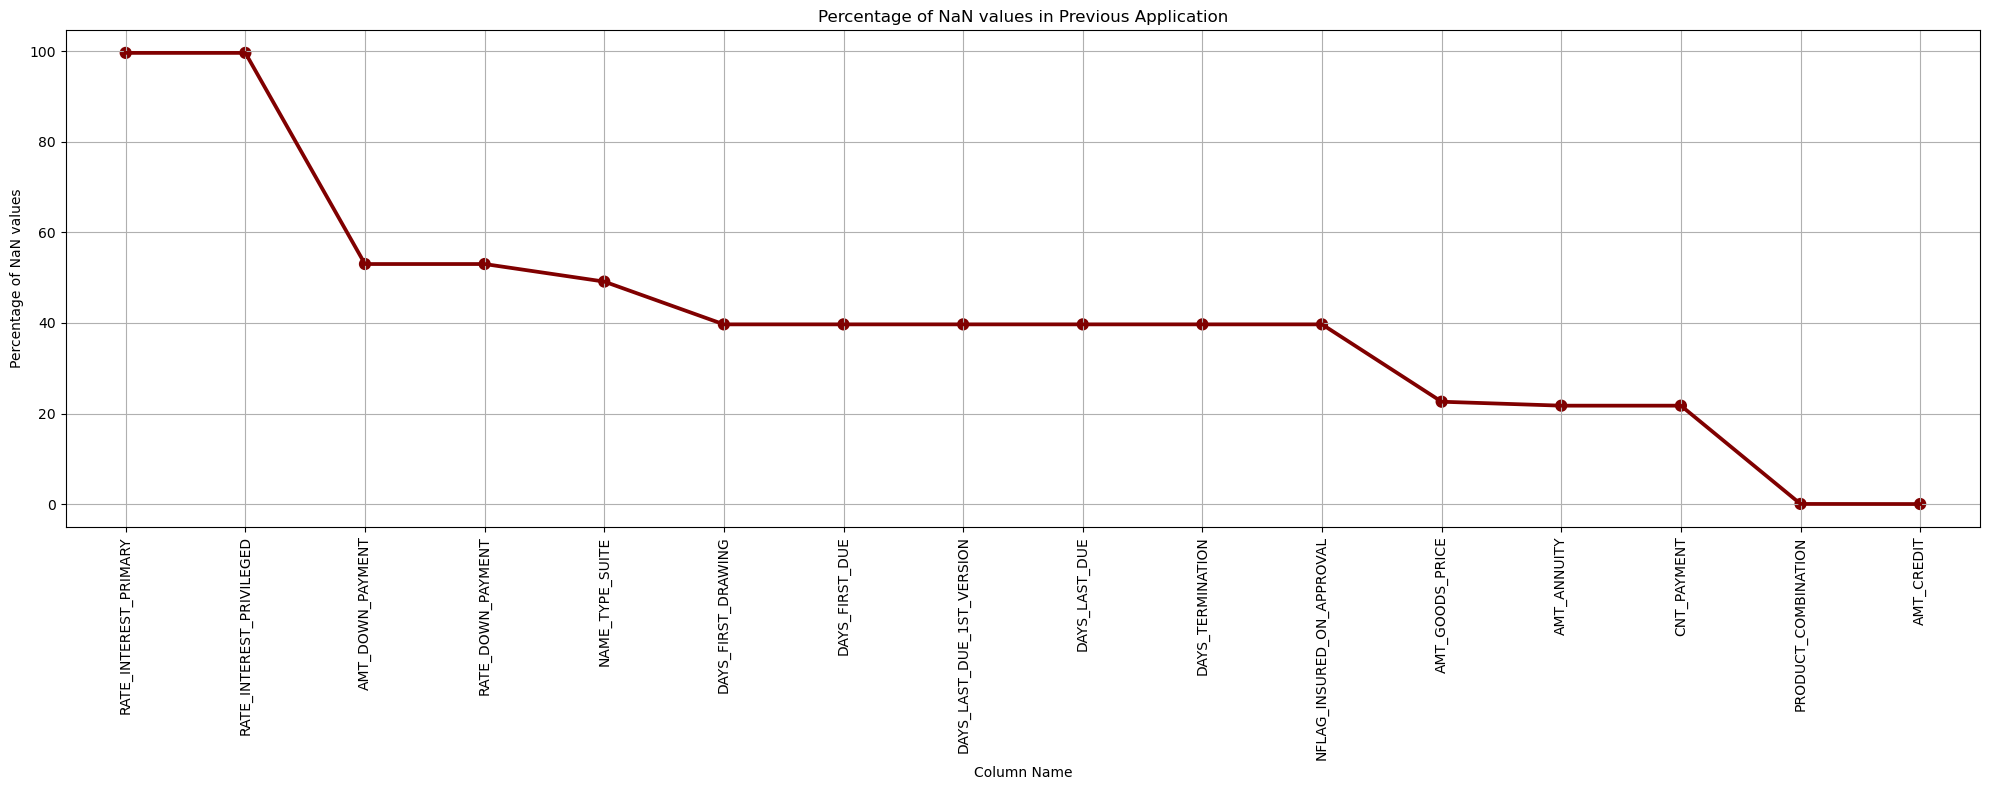

In [6]:
plot_missing_values_percent(previous_application, 'Previous Application', grid=True)

1. Có 16/37 features có chứa giá trị NaN
2. Tỉ lệ NaN có sự khác biệt giữa các features:
- 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED': NaN gần như toàn bộ 2 features này, có thể bỏ đi trong quá trình engineering
- 'PRODUCT_COMBINATION', 'AMT_CREDIT': Tỉ lệ NaN nhỏ (<0.1%), không ảnh hưởng quá nhiều đến kết quả nên có thể bỏ đi các hàng có chứa giá trị NaN ở các feature này trong quá trình engineering
- Các features còn lại: Có thể xem xét fillna với mean (numerical features) hoặc mode (categorical features)

##### Merge with Target column to get more insight

In [7]:
previous_application_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], previous_application, how='left', on=['SK_ID_CURR'])
previous_application_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


## Numerical Features

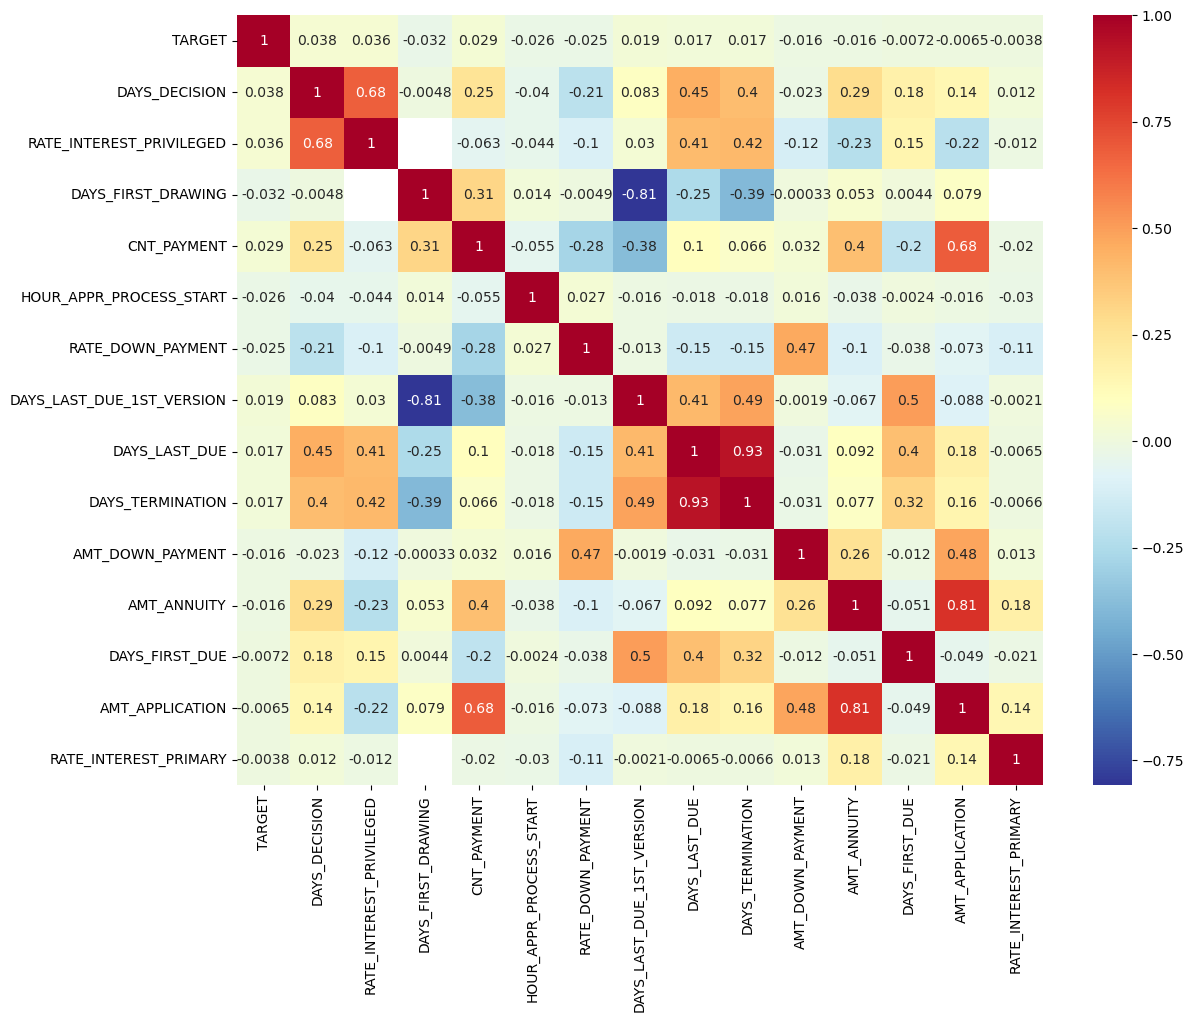

In [8]:
correlation_matrix(previous_application_merged, 15, numerical = True)

<b>Nhận xét</b>:
1. Heatmap trên cho biết mức độ tương quan giữa 1 số features (có mức độ tương quan cao nhất với biến Target) với nhau.
2. Từ đó, ta có thể thấy 1 vài nhóm features có mức độ tương quan với nhau tương đối cao:
- 'DAYS_LAST_DUE' & 'DAYS_TERMINATION'
- 'AMT_ANNUITY' & 'AMT_APPLICATION' & 'AMT_CREDIT' & 'AMT_GOODS_PRICE'

=> Có thể xem xét tạo ra một số features mới bằng cách thực hiện cách toán tử giữa các features trong cùng 1 nhóm 

3. Mức độ tương quan của các đặc điểm với biến TARGET không đáng kể, điều này cho thấy sự vắng mặt của mối quan hệ tuyến tính giữa features và biến TARGET.

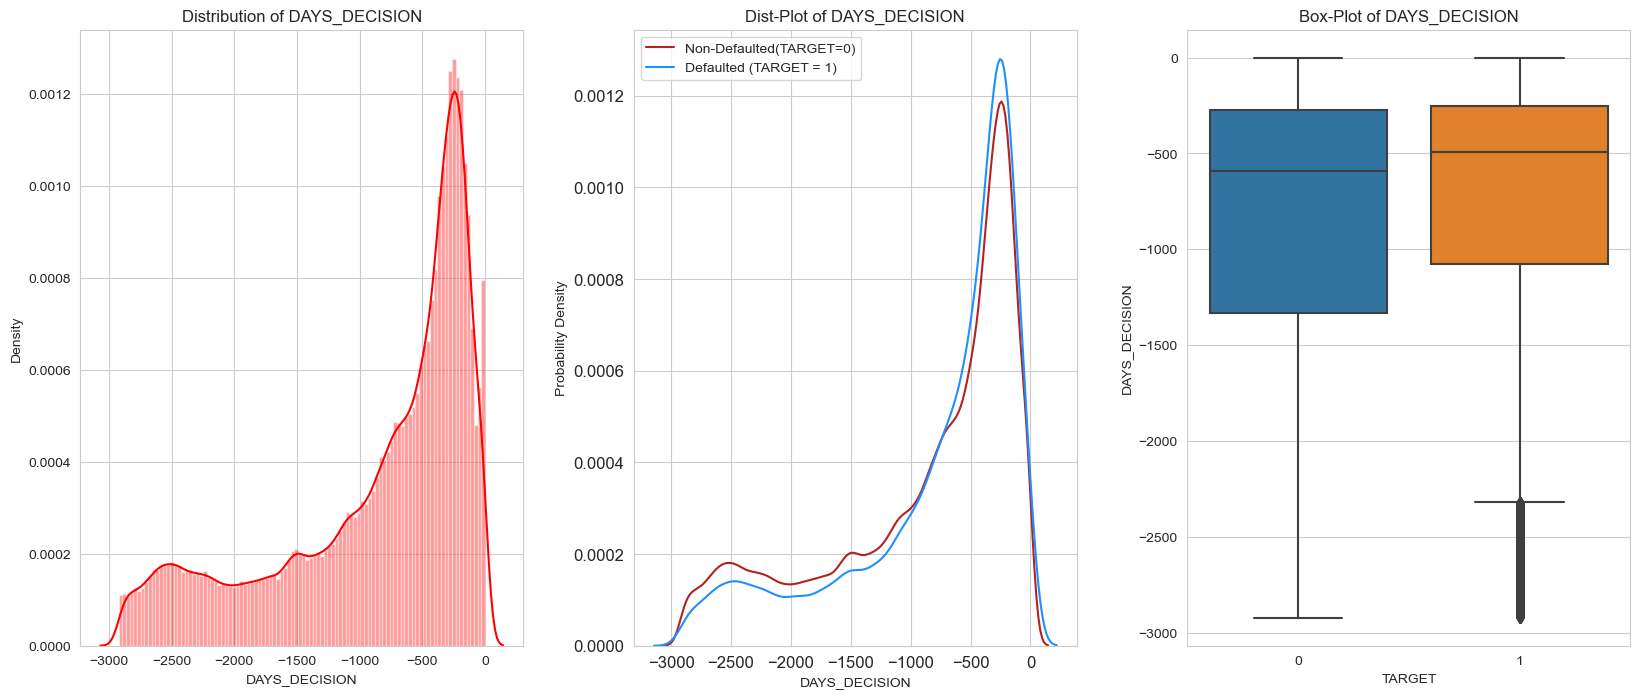

In [9]:
plot_numerical_variables(previous_application_merged, 'DAYS_DECISION')

##### DAYS_DECISION
- Có thể thấy phân phối cho biến Target 0 và 1 gần như giống nhau. Tuy nhiên với biến Target=1, dữ liệu có xuất hiện khá nhiều outliers.
- Dữ liệu tập trung ở khoảng -350 đến -1350, khoảng cách khá lớn nên có thể chuyển đổi từ ngày về năm.

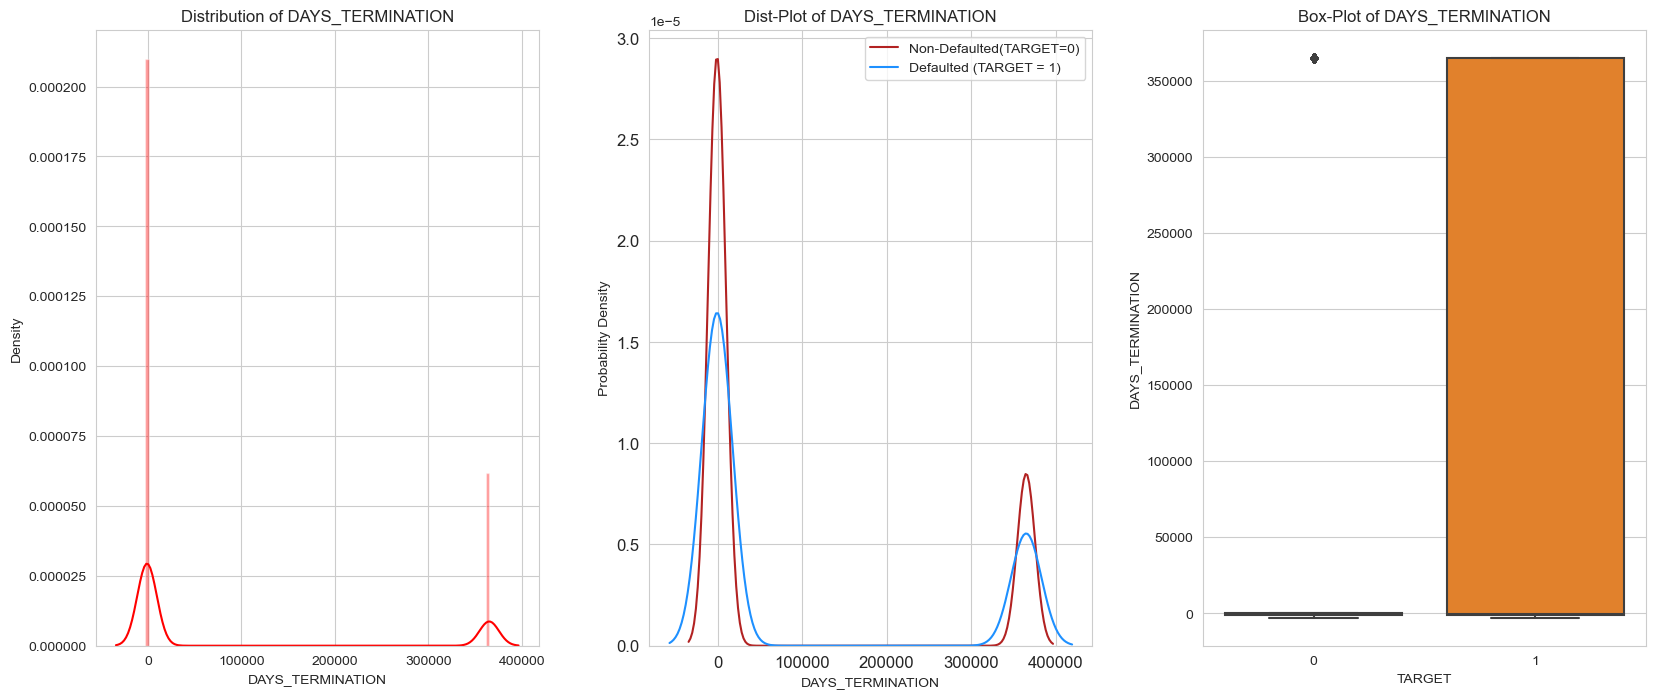

In [10]:
plot_numerical_variables(previous_application_merged, 'DAYS_TERMINATION')

##### DAYS_TERMINATION
- Phân phối chênh lệch khá lớn giữa Target=0 và Target=1. Các khoản vay trả nợ thành công (Target=0) tập trung ở các giá trị thấp, tức là có thời gian kết thúc sớm, trong khi các khoản vay có nợ xấu có giá trị day_termination trải dài từ thấp đến cao
- Có thể thấy ở feature này xuất hiện khá nhiều giá trị bất thường trong khoảng từ 30000 đến 40000 ngày

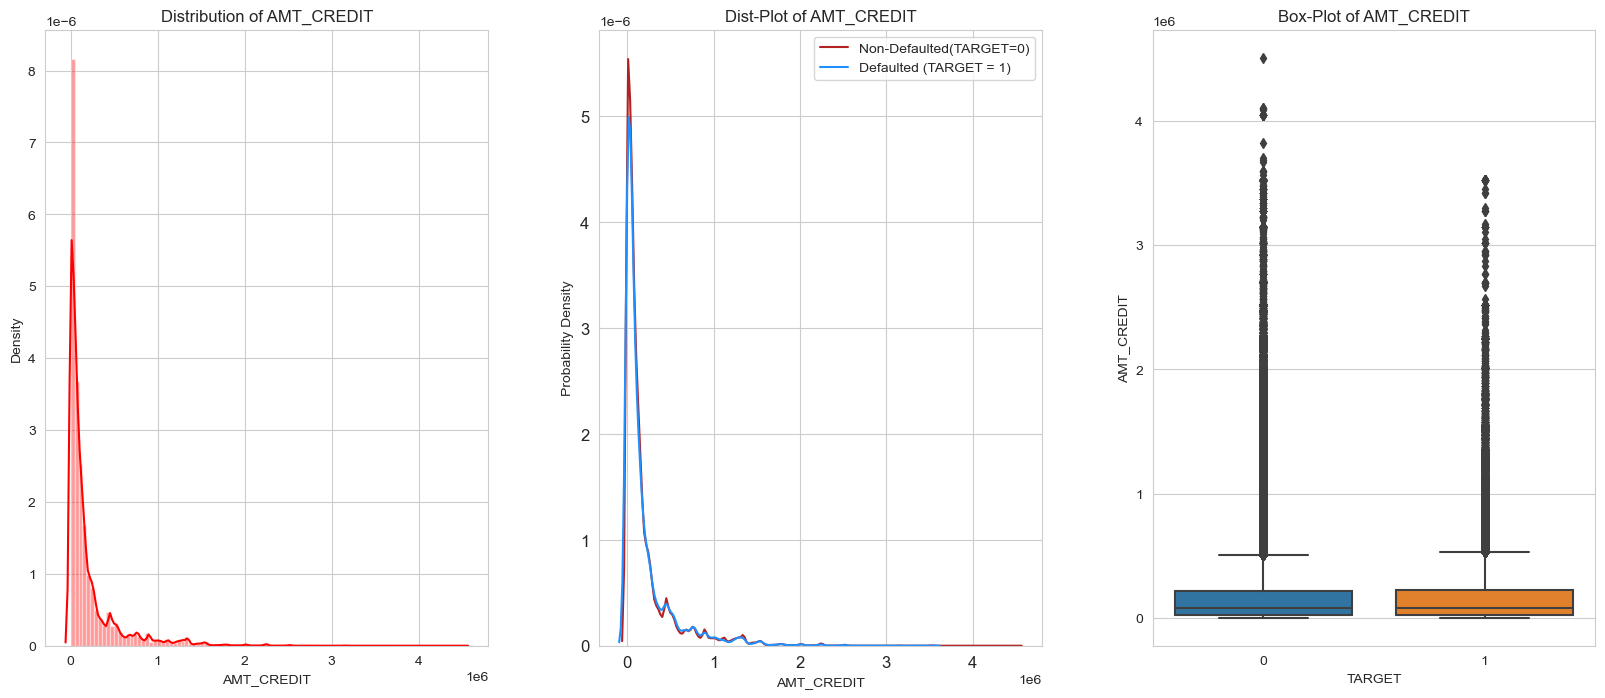

In [11]:
plot_numerical_variables(previous_application_merged, 'AMT_CREDIT')

##### AMT_CREDIT
- Phân phối giữa 2 biến khá giống nhau
- Dữ liệu có nhiều outliers cần handle

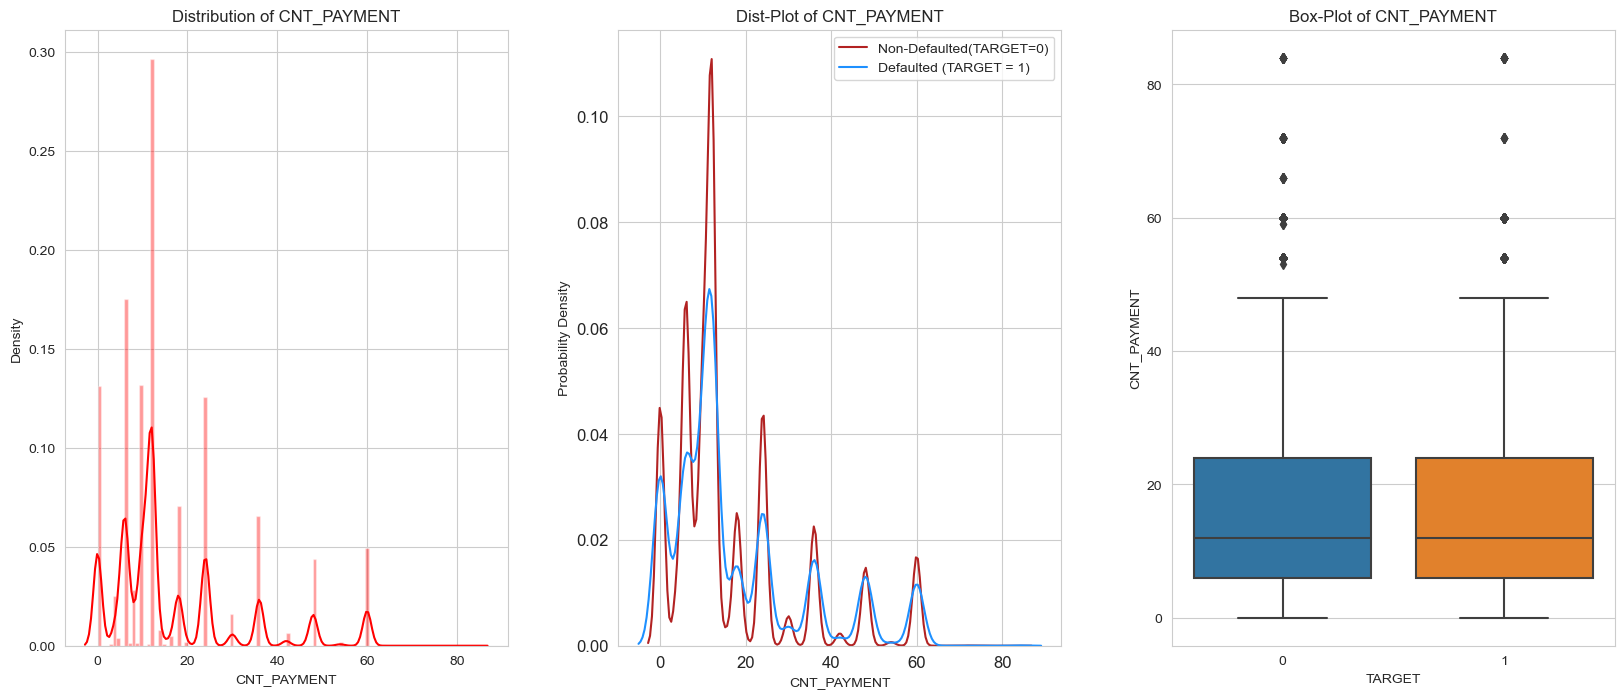

In [12]:
plot_numerical_variables(previous_application_merged, 'CNT_PAYMENT')

##### CNT_PAYMENT
- Các khoản thanh toán của các khoản vaycó nợ xấu (Target=1) có xu hướng tập trung ở các giá trị thấp hơn các khoản vay trả nợ thành công (Target=0)

## Categorical Features

interval columns not set, guessing: ['TARGET']
interval columns not set, guessing: ['TARGET']


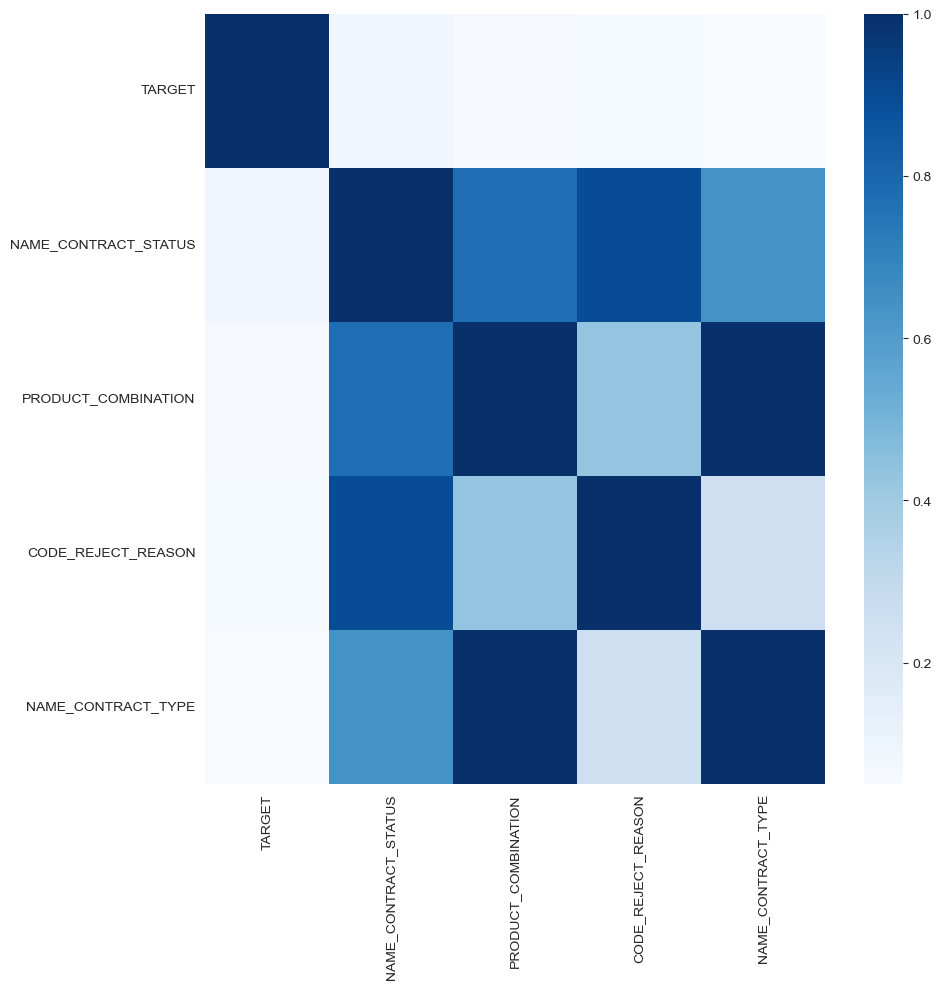

In [13]:
correlation_matrix(previous_application_merged,5, numerical = False, categorical = True )

<b>Nhận xét</b>:
- Biểu đồ cho thấy top 5 categorical feature có correlation với biến TARGET cao nhất. Tuy nhiên có thể thấy mức độ tương quan với biến TARGET của các feature không cao nhưng lại có sự tương quan cao giữa các feature.

Total Number of unique categories of NAME_CONTRACT_TYPE = 5


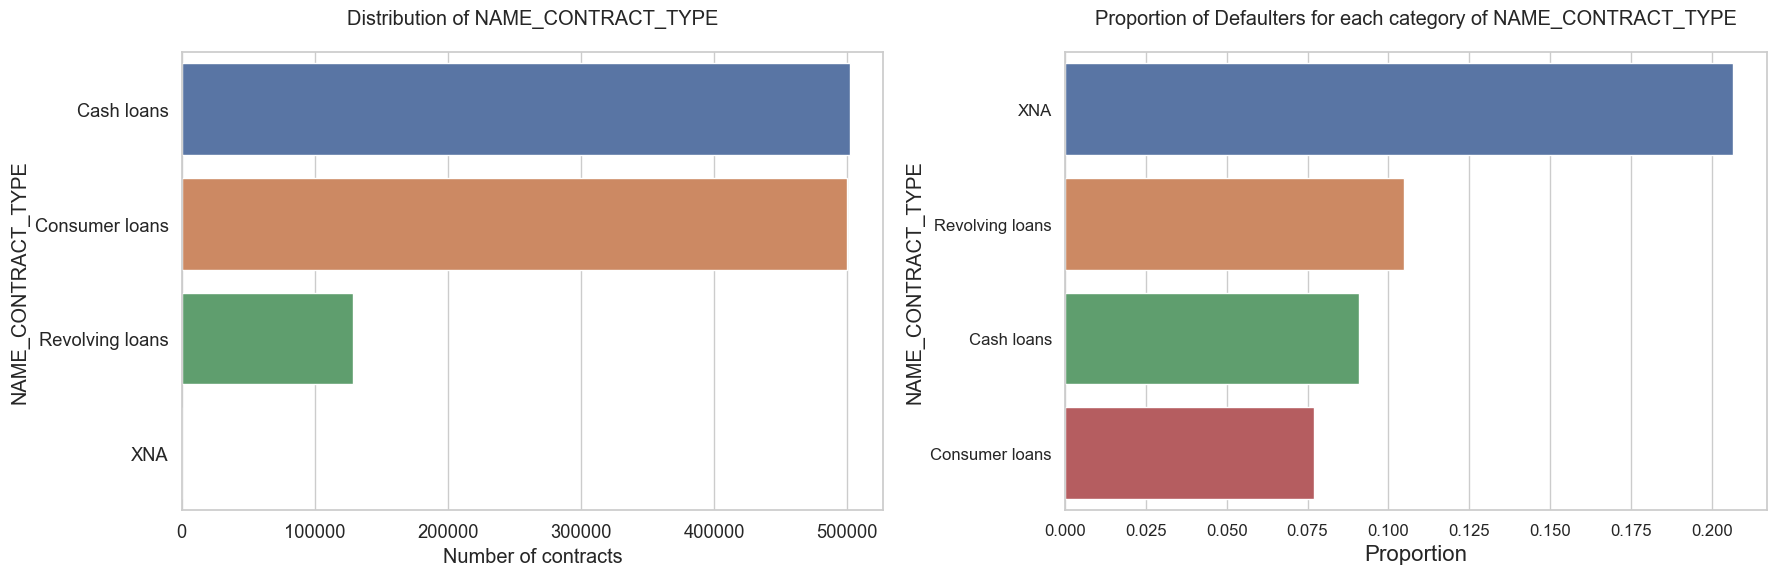

In [14]:
plot_categorical_variables(previous_application_merged, 'NAME_CONTRACT_TYPE')

##### NAME_CONTRACT_TYPE
- Cash loans và Consumer loans chiếm phần lớn.
- Revolving loans chiếm phần nhỏ nhưng tỉ lệ nợ xấu đối với loại vay này lại lớn hơn 1 chút so với 2 loại còn lại.
- XNA là 1 giá trị không xác định nhưng lại là loại chiếm tỉ lệ nợ xấu cao nhất -> điều này đặt cho chúng ta một câu hỏi rằng liệu việc thiếu dữ liệu ở một số feature có phải là dấu hiệu của nợ xấu.

Total Number of unique categories of NAME_CONTRACT_STATUS = 5


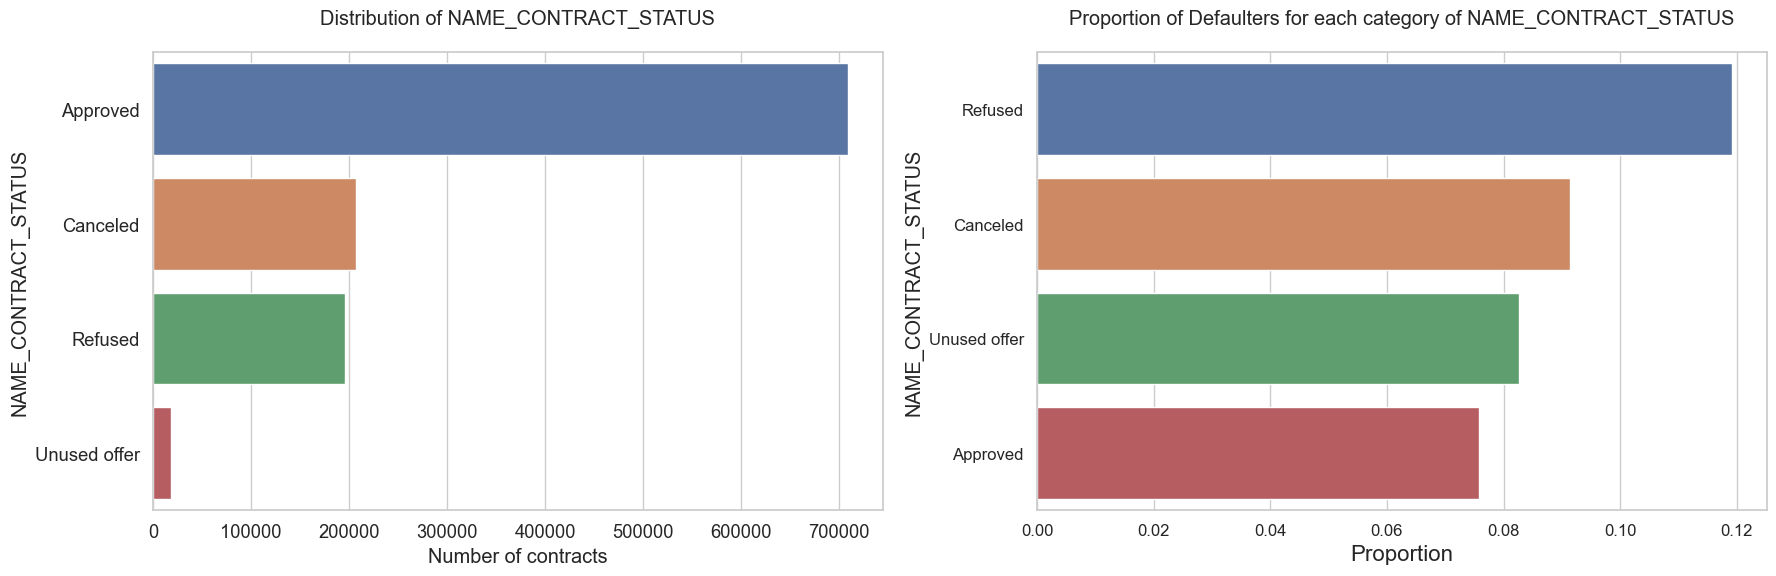

In [15]:
plot_categorical_variables(previous_application_merged, 'NAME_CONTRACT_STATUS')

In [16]:
total_approved = previous_application_merged[previous_application_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
default_approved = previous_application_merged[(previous_application_merged["NAME_CONTRACT_STATUS"] == "Approved") & (previous_application_merged["TARGET"] == 1)].shape[0]

print(f"Tỉ lệ nợ xấu của những khách hàng có những khoảng vay cũ thành công: {default_approved/total_approved * 100}%")

Tỉ lệ nợ xấu của những khách hàng có những khoảng vay cũ thành công: 7.583832968893278%


In [17]:
total_refused = previous_application_merged[previous_application_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
nondefault_refused = previous_application_merged[(previous_application_merged["NAME_CONTRACT_STATUS"] == "Refused") & (previous_application_merged["TARGET"] == 0)].shape[0]

print(f"Tỉ lệ trả nợ thành công của những khách hàng bị từ chối ở khoản vay trước đó: {nondefault_refused/total_refused * 100}%")

Tỉ lệ trả nợ thành công của những khách hàng bị từ chối ở khoản vay trước đó: 88.08011176488584%


##### NAME_CONTRACT_STATUS
- Tỉ lệ các khoản vay không trả nợ đối với các hợp đồng bị từ chối cao hơn đáng kể so với các loại hợp đồng còn lại (được chấp nhận, bị hủy bỏ...)
- Trạng thái của những khoản vay cũ chiếm nhiều nhất là 'Approved' chiếm hơn 65% tổng số khoản vay trong khi tỉ lệ nợ xấu cao nhất là 'Refused'. Điều này là hợp lý khi những người có những khoản vay trước không thành công thì có xu hướng sẽ là nợ xấu hơn

Total Number of unique categories of CODE_REJECT_REASON = 10


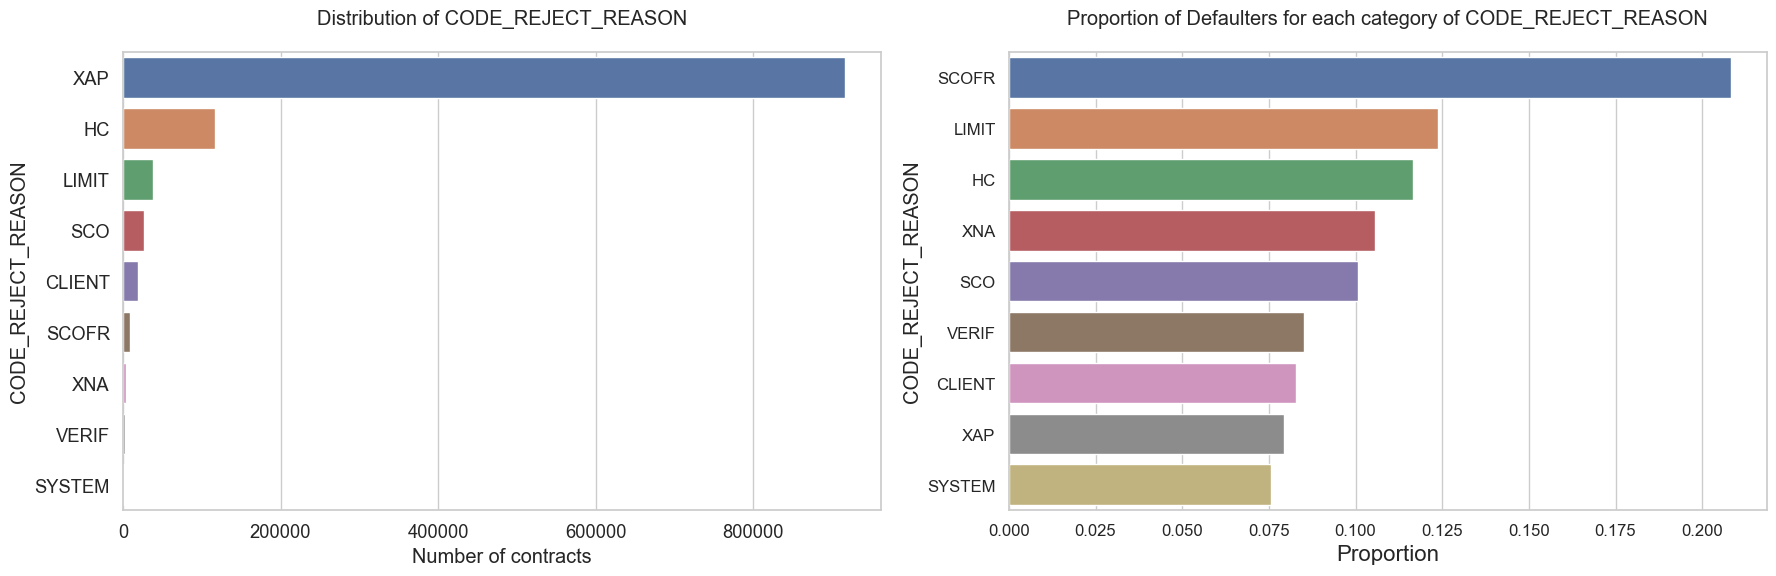

In [18]:
plot_categorical_variables(previous_application_merged, 'CODE_REJECT_REASON')

##### CODE_REJECT_REASON
- Tỉ lệ nợ xấu của các hợp đồng bị từ chối với lí do SCOFR đặc biệt cao hơn so với các lí do khác

Total Number of unique categories of NAME_CASH_LOAN_PURPOSE = 26


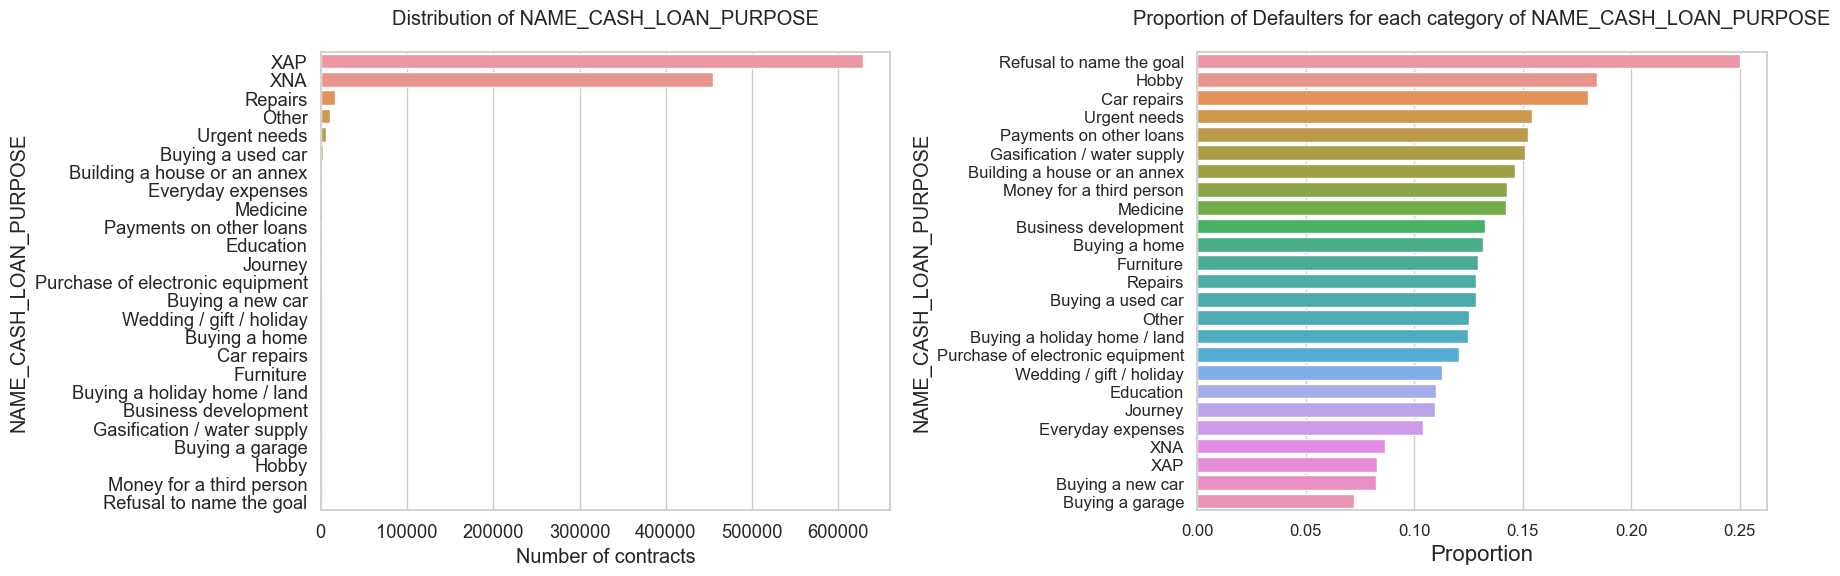

In [19]:
plot_categorical_variables(previous_application_merged, 'NAME_CASH_LOAN_PURPOSE')

##### NAME_CASH_LOAN_PURPOSE
- Bỏ qua XNA và XAP thì tỉ lệ nợ xấu của 1 số mục đích vay tiền đáng chú ý hơn: Refusal to name the goal, Hobby, Car repairs

Total Number of unique categories of WEEKDAY_APPR_PROCESS_START = 8


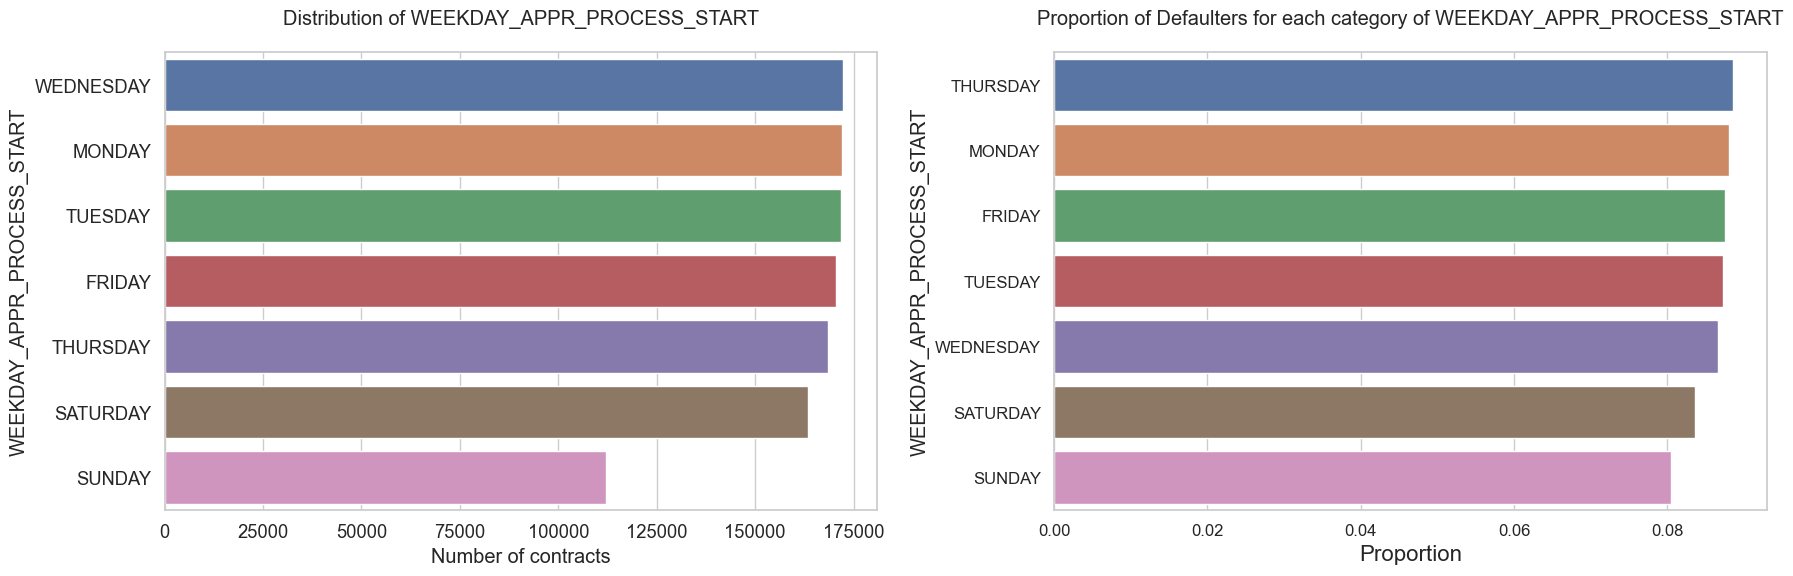

In [20]:
plot_categorical_variables(previous_application_merged, 'WEEKDAY_APPR_PROCESS_START')

##### WEEKDAY_APPR_PROCESS_START
- Không có sự khác biệt quá lớn giữa các ngày trong tuần => có thể bỏ qua

Total Number of unique categories of NAME_PAYMENT_TYPE = 5


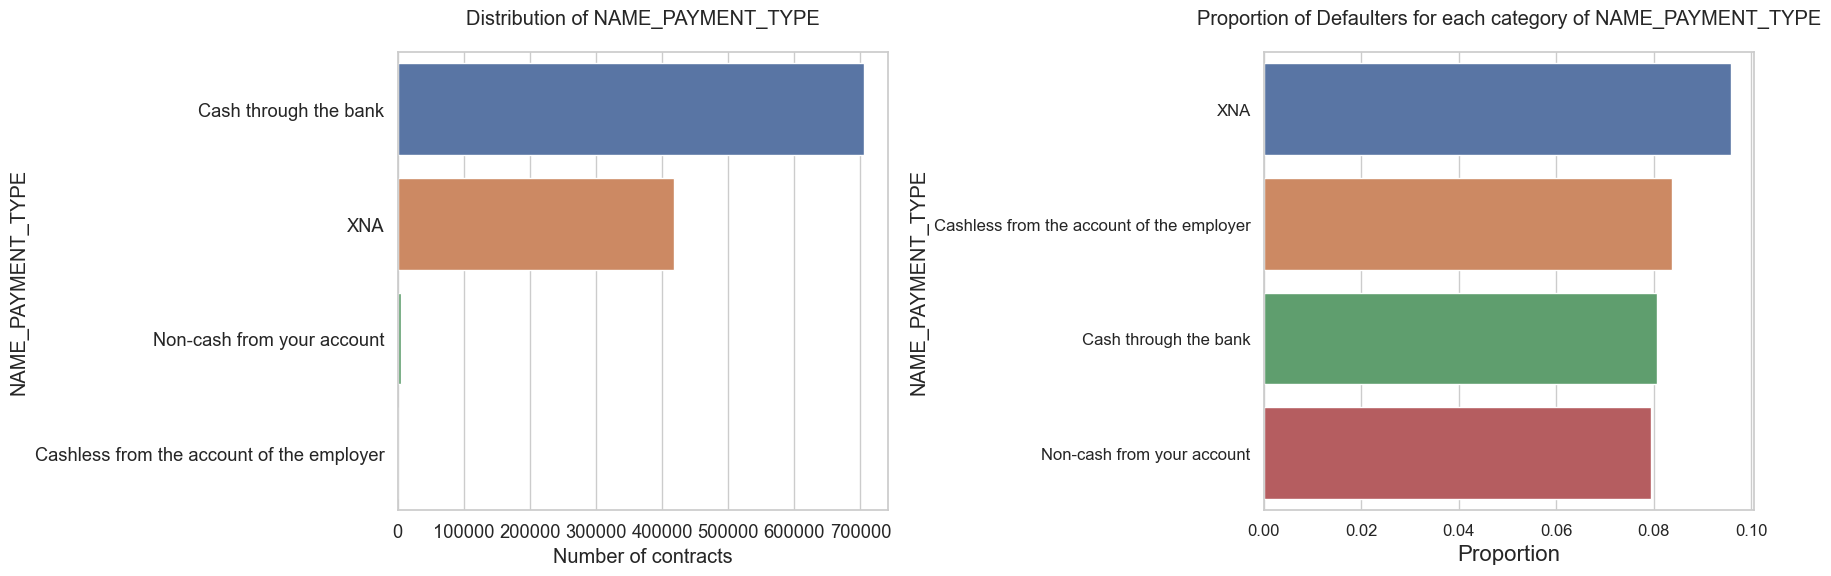

In [21]:
plot_categorical_variables(previous_application_merged, 'NAME_PAYMENT_TYPE')

##### NAME_PAYMENT_TYPE
- Phần lớn khách hàng lựa chọn phương thức thanh toán là Cash through the bank
- Tuy nhiên thì không có sự chênh lệch quá lớn giữa tỉ lệ nợ xấu của từng phương thức khác nhau

Total Number of unique categories of NAME_PRODUCT_TYPE = 4


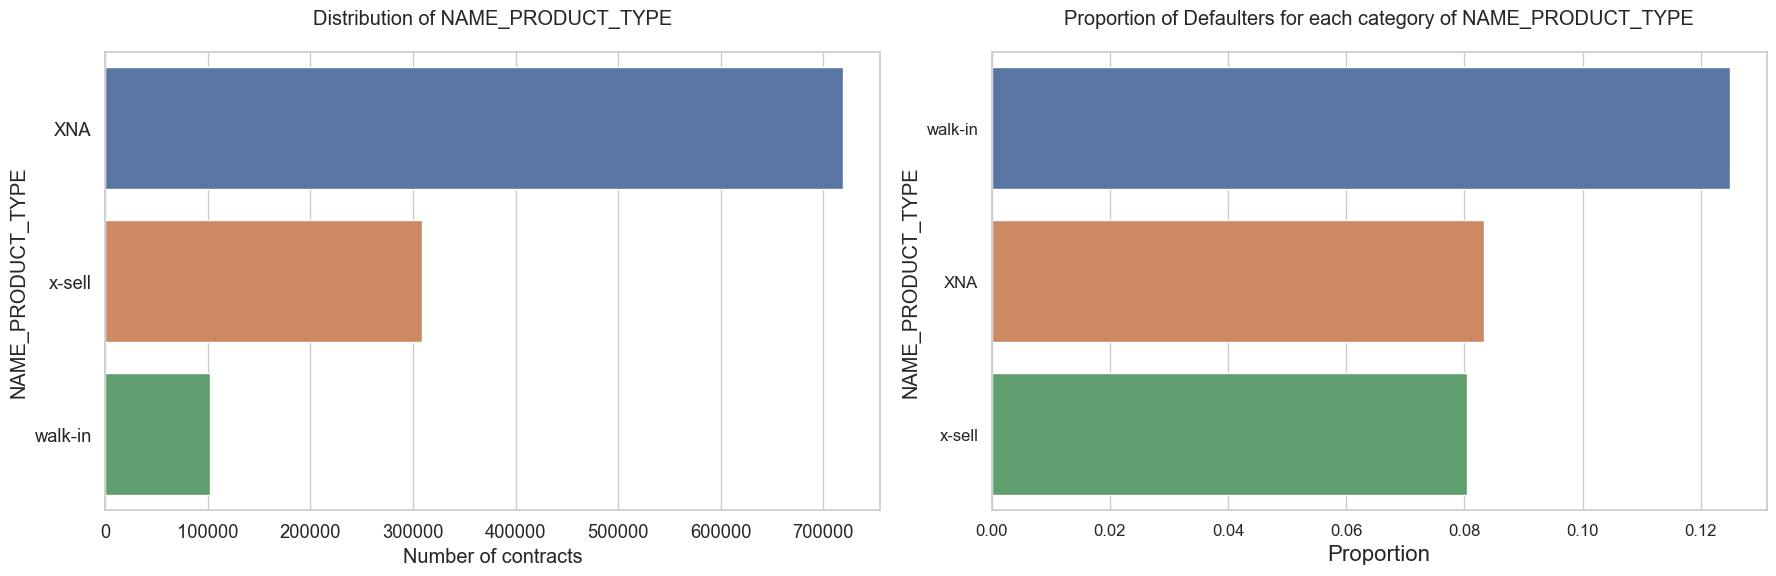

In [22]:
plot_categorical_variables(previous_application_merged, 'NAME_PRODUCT_TYPE')

##### NAME_PRODUCT_TYPE
- So với x-sell thì walk-in chiếm phần nhỏ hơn nhưng tỉ lệ nợ xấu ở các khách hàng này lại cao hơn đáng kể

### NEW FEATURES

##### AMT_DECLINED
Chênh lệch giữa số tiền tín dụng được khách hàng yêu cầu và số tiền thực tế mà khách hàng được nhận. Giá trị  này cho biết khách hàng nhận được ít hay nhiều hơn so với số tiền mà họ đăng ký trước đó.

In [23]:
previous_application_merged['AMT_DECLINED'] = previous_application_merged['AMT_APPLICATION'] - previous_application_merged['AMT_CREDIT']

##### AMT_CREDIT_GOODS_RATIO
Tỉ lệ giữa số tiền khách hàng nhận được và giá hàng hóa mà khách hàng đăng ký. Giá trị này cho thấy số tiền khách hàng nhận được liệu có phù hợp với giá hàng hóa mà khách hàng đăng kí hay không. 

In [24]:
previous_application_merged['AMT_CREDIT_GOODS_RATIO'] = previous_application_merged['AMT_CREDIT'] / (previous_application_merged['AMT_GOODS_PRICE'] + 0.00001)

##### AMT_CREDIT_GOODS_DIFF
Chênh lệch giữa số tiền khách hàng nhận được và giá hàng hóa mà khách hàng đăng ký.

In [25]:
previous_application_merged['AMT_CREDIT_GOODS_DIFF'] = previous_application_merged['AMT_CREDIT'] - previous_application_merged['AMT_GOODS_PRICE']

##### AMT_CREDIT_APPLICATION_RATIO
Tỷ lệ giữa số tiền tín dụng được khách hàng yêu cầu và số tiền thực tế mà khách hàng được nhận. Giá trị này thể hiện phần trăm tín dụng được yêu cầu mà khách hàng nhận được.

In [26]:
previous_application_merged['AMT_CREDIT_APPLICATION_RATIO'] = previous_application_merged['AMT_APPLICATION'] / (previous_application_merged['AMT_CREDIT'] + 0.00001)

##### CREDIT_DOWNPAYMENT_RATIO
Tỷ lệ giữa số tiền đặt cọc do khách hàng thực hiện và số tiền tín dụng mà khách hàng nhận được. Giá trị này cho biết tỷ lệ số tiền tín dụng đã được khách hàng chi trả bằng khoản trả trước.

In [27]:
previous_application_merged['CREDIT_DOWNPAYMENT_RATIO'] = previous_application_merged['AMT_DOWN_PAYMENT'] / (previous_application_merged['AMT_CREDIT'] + 0.00001)

##### GOODS_DOWNPAYMENT_RATIO
Tỷ lệ số tiền đặt cọc của khách hàng so với giá hàng hóa mà khách hàng đăng ký. Giá trị này cho thấy tỷ lệ giá hàng hóa được thanh toán bằng khoản trả trước.

In [28]:
previous_application_merged['GOOD_DOWNPAYMET_RATIO'] = previous_application_merged['AMT_DOWN_PAYMENT'] / (previous_application_merged['AMT_GOODS_PRICE'] + 0.00001)

##### INTEREST_DOWNPAYMENT
Khoản tiền lãi trả cho khoản trả trước của khách hàng.

In [29]:
previous_application_merged['INTEREST_DOWNPAYMENT'] = previous_application_merged['RATE_DOWN_PAYMENT'] * previous_application_merged['AMT_DOWN_PAYMENT']

##### INTEREST_CREDIT
Số tiền lãi trên số tiền tín dụng mà khách hàng nhận được dựa trên lãi suất chính.

In [30]:
previous_application_merged['INTEREST_CREDIT'] = previous_application_merged['AMT_CREDIT'] * previous_application_merged['RATE_INTEREST_PRIMARY']

##### INTEREST_CREDIT_PRIVILEGED
Số tiền lãi trên số tiền tín dụng mà khách hàng nhận được dựa trên lãi suất ưu đãi.

In [31]:
previous_application_merged['INTEREST_CREDIT_PRIVILEGED'] = previous_application_merged['AMT_CREDIT'] * previous_application_merged['RATE_INTEREST_PRIVILEGED']

##### APPLICATION_AMT_TO_DECISION_RATIO
Tỷ lệ số tiền tín dụng được khách hàng yêu cầu so với số ngày cần để đưa ra quyết định, có thể thể hiện mức độ khẩn cấp hoặc hiệu quả trong việc việc đưa ra quyết định.

In [32]:
previous_application_merged['APPLICATION_AMT_TO_DECISION_RATIO'] = previous_application_merged['AMT_APPLICATION'] / (previous_application_merged['DAYS_DECISION'] + 0.00001) * -1

##### AMT_APPLICATION_TO_SELLERPLACE_AREA
Tỷ lệ số tiền tín dụng được khách hàng yêu cầu so với khu vực bán hàng của người bán, có thể cho biết mật độ yêu cầu tín dụng liên quan đến khu vực của người bán.

In [33]:
previous_application_merged['AMT_APPLICATION_TO_SELLERPLACE_AREA'] = previous_application_merged['AMT_APPLICATION'] / (previous_application_merged['SELLERPLACE_AREA'] + 0.00001)

##### ANNUITY
Khoản thanh toán định kỳ trên số tiền tín dụng mà khách hàng nhận được, tính dựa trên thời hạn của tín dụng.

In [34]:
previous_application_merged['ANNUITY'] = previous_application_merged['AMT_CREDIT'] / (previous_application_merged['CNT_PAYMENT'] + 0.00001)

##### ANNUITY_GOODS
Khoản thanh toán định kỳ dựa trên giá hàng hóa và tính theo thời hạn tín dụng.

In [35]:
previous_application_merged['ANNUITY_GOODS'] = previous_application_merged['AMT_GOODS_PRICE'] / (previous_application_merged['CNT_PAYMENT'] + 0.00001)

##### DAYS_FIRST_LAST_DUE_DIFF
Khoảng thời gian tính từ ngày đến hạn đầu tiên và ngày đến hạn cuối cùng của hồ sơ đăng ký vay tín dụng trước đó. Giá trị này có khả năng cho biết khoảng thời gian của thời hạn tín dụng.

In [36]:
previous_application_merged['DAYS_FIRST_LAST_DUE_DIFF' ] = previous_application_merged['DAYS_LAST_DUE'] - previous_application_merged['DAYS_FIRST_DUE']

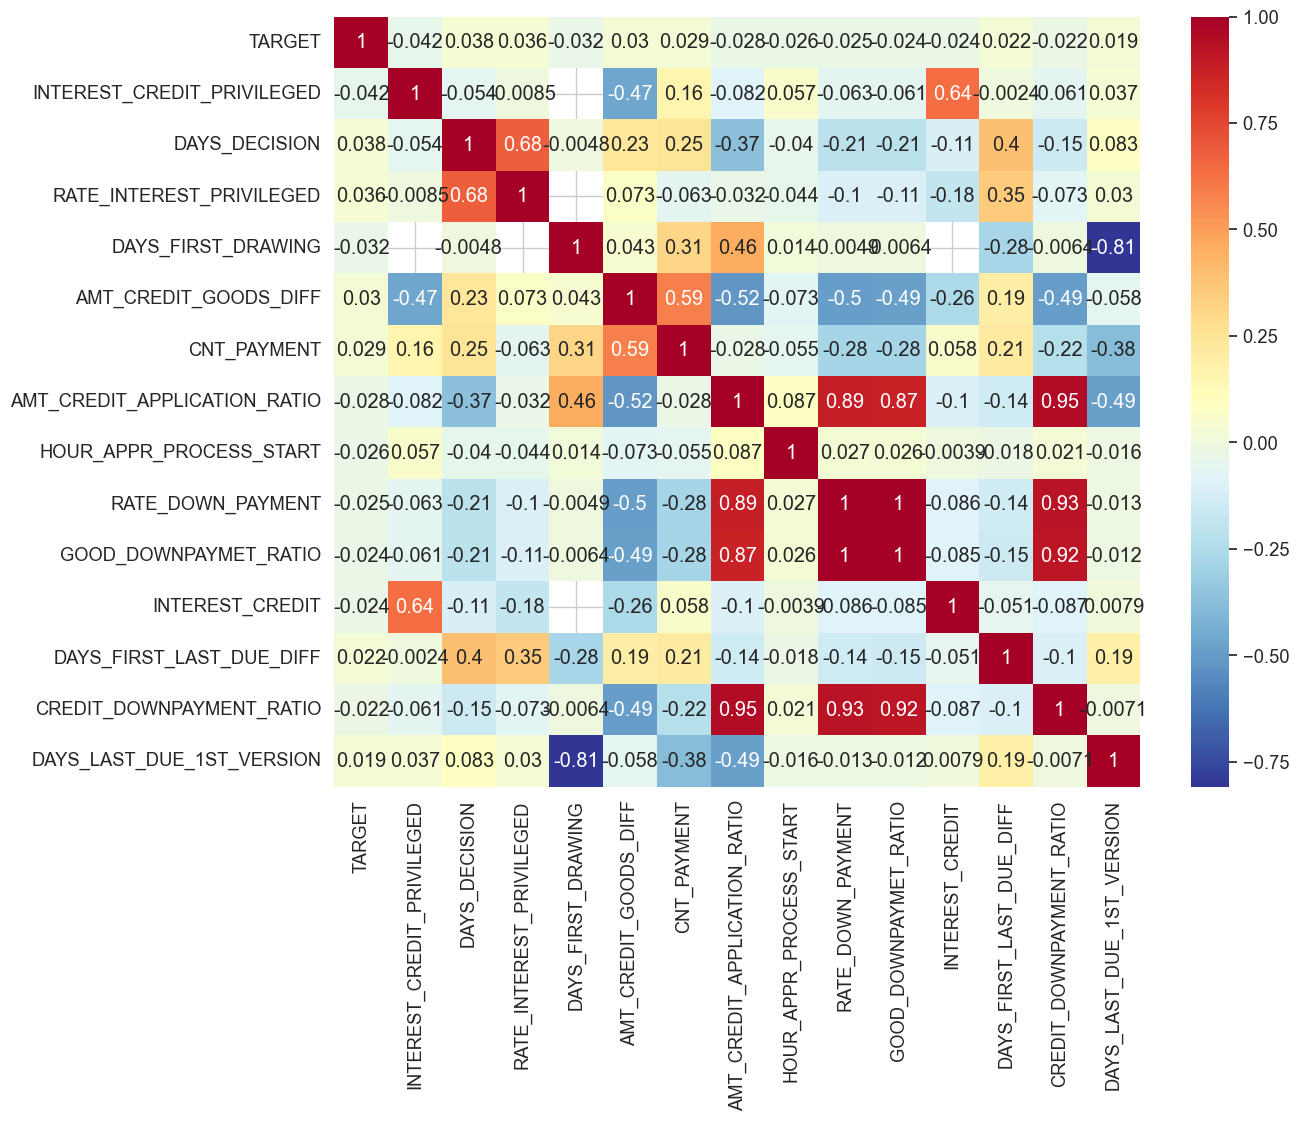

In [37]:
correlation_matrix(previous_application_merged, 15, numerical = True)

<b>Nhận xét</b>:
- Từ biểu đồ heatmap có thể thấy những feature mới tạo thành có correlation tương đối cao với feature 'TARGET'

<b>